In [1]:
import numpy as np
import pickle as pkl
from pprint import pprint
import os
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
plt.ion()

In [2]:
dr='/Users/tianyichen/Desktop/Research /PhDresearch/Hopkins_Organoid/April 19 2024/Run_8_TBS_Experiment_ecr_results_windowed/230601 RUN 8 Wells 1-3'

In [3]:
filenames=os.listdir(dr)
filenames

['#12 (well #3 post stim 3)',
 '#4 (well #1 post stim 3)',
 '#6 (well #2 post stim 1)',
 '.DS_Store',
 '#3 (well #1 post stim 2)',
 '#18 ( Well #1 340 minutes Well #2 240 minutes Well #3 180 minutes)',
 '#9 (well #2 post stim 4)',
 '#11 (well #3 post stim 2)',
 '#17 (Well #1 310 minutes Well #2 210 minutes Well #3 150 minutes)',
 '#15 (Well #1 210 minutes Well #2 150 minutes Well #3 90 minutes)',
 '#16 (Well #1 240 minutes Well #2 180 minutes Well #3 120 minutes',
 '#7 (well #2 post stim 2)',
 '#8 (well #2 post stim 3)',
 '#14 (Well #1 180 minutes Well #2 120 minutes Well #3 60 minutes)',
 '#1 (baseline)',
 '#2 (well #1 post stim 1)',
 '#5 (well #1 post stim 4)',
 '#10 (well #3 post stim 1)',
 '#13 (well #3 post stim 4)']

In [6]:
filenames.remove('.DS_Store')

In [7]:
sorted_filenames = sorted(filenames, key=lambda x: int(x.split('#')[1].split()[0]))
sorted_filenames

['#1 (baseline)',
 '#2 (well #4 post stim 1)',
 '#3 (well #4 post stim 2)',
 '#4 (well #4 post stim 3)',
 '#5 (well #4 post stim 4)',
 '#6 (well #5 post stim 1)',
 '#7 (well #5 post stim 2)',
 '#8 (well #5 post stim 3)',
 '#9 (well #5 post stim 4)',
 '#10 (well #6 post stim 1)',
 '#11 (well #6 post stim 2)',
 '#12 (well #6 post stim 3)',
 '#13 (well #6 post stim 4)',
 '#14 (Well #4 180 min, Well #5 120 min, Well #6 60 min)',
 '#15 (Well #4 210 minutes after, Well #5 150 minutes after, Well #6 90 mintes after',
 '#16 (Well #4 240 minutes after, Well #5 180 minutes after, Well #6 120 mintes after)',
 '#17 (310 minutes after, Well #5 210 minutes after, Well #6 150 mintes after)',
 '#18 (340 minutes after, Well #5 240 minutes after, Well #6 180 mintes after)']

In [7]:
indices = [i for i, filename in enumerate(sorted_filenames) if 'well #1' in filename.lower()]
print(indices)

[1, 2, 3, 4, 13, 14, 15, 16, 17]


In [8]:
os.chdir(dr)

In [8]:
sorted_filenames_updated = [filename + '/data.raw_20240415_18h04m.pkl' for filename in sorted_filenames]
sorted_filenames_updated

['#1 (baseline)/data.raw_20240415_18h04m.pkl',
 '#2 (well #4 post stim 1)/data.raw_20240415_18h04m.pkl',
 '#3 (well #4 post stim 2)/data.raw_20240415_18h04m.pkl',
 '#4 (well #4 post stim 3)/data.raw_20240415_18h04m.pkl',
 '#5 (well #4 post stim 4)/data.raw_20240415_18h04m.pkl',
 '#6 (well #5 post stim 1)/data.raw_20240415_18h04m.pkl',
 '#7 (well #5 post stim 2)/data.raw_20240415_18h04m.pkl',
 '#8 (well #5 post stim 3)/data.raw_20240415_18h04m.pkl',
 '#9 (well #5 post stim 4)/data.raw_20240415_18h04m.pkl',
 '#10 (well #6 post stim 1)/data.raw_20240415_18h04m.pkl',
 '#11 (well #6 post stim 2)/data.raw_20240415_18h04m.pkl',
 '#12 (well #6 post stim 3)/data.raw_20240415_18h04m.pkl',
 '#13 (well #6 post stim 4)/data.raw_20240415_18h04m.pkl',
 '#14 (Well #4 180 min, Well #5 120 min, Well #6 60 min)/data.raw_20240415_18h04m.pkl',
 '#15 (Well #4 210 minutes after, Well #5 150 minutes after, Well #6 90 mintes after/data.raw_20240415_18h04m.pkl',
 '#16 (Well #4 240 minutes after, Well #5 180 min

In [10]:
def filter_matrix(src_filename, well, win):
    # Load data from the specified source file
    with open(src_filename, 'rb') as f:
        data = pkl.load(f)

    # Extract necessary data from the loaded data structure
    adj_matrix = data[well][win]['adj_matrix_predicted']
    votes = data[well][win]['votes']  # This variable is loaded but not used in the snippet you provided
    corr_peaks = data[well][win]['corr_peaks']
    fs = data['config']['data']['fs']  # Sampling frequency

    # Initialize a matrix to track synchronization based on correlation peaks
    synced_matrix = np.full(adj_matrix.shape, False)
    for key in corr_peaks.keys():
        if np.all(np.abs(np.array(corr_peaks[key]['delays'])) < 1/fs):
            synced_matrix[key[0], key[1]] = True
            synced_matrix[key[1], key[0]] = True

    # Create the filtered matrix as per the given logic
    filtered_matrix = np.logical_and(adj_matrix, np.logical_not(synced_matrix))

    return filtered_matrix

In [30]:
with open(sorted_filenames_updated[0], 'rb') as f:
        data = pkl.load(f)

In [34]:
data.keys()

dict_keys(['source_filename', 'config', 'well000', 'well001', 'well002', 'well003', 'well004', 'well005'])

In [45]:
sum(sum(data['well000']['win_2']['adj_matrix_predicted']))

3

In [11]:
import numpy as np
import itertools

all_well=['well000', 'well001', 'well002', 'well003', 'well004', 'well005']
all_win=[ 'win_0', 'win_1', 'win_2', 'win_3', 'win_4', 'win_5', 'win_6', 'win_7', 'win_8', 'win_9']

summary_array = np.empty((60, 1), dtype=np.dtype([('col1', 'U10'), ('col2', 'U10'), ('col3', float), ('col4', float)]))

# Create the Cartesian product of all_well and all_win
cartesian_product = list(itertools.product(all_well, all_win))

summary_array['col1'] = np.array([item[0] for item in cartesian_product]).reshape((60,1))
summary_array['col2'] = np.array([item[1] for item in cartesian_product]).reshape((60,1))

In [12]:
def calculate_summary(well_choosen, win_choosen):
    m = len(sorted_filenames_updated)
    all_adj = []
    for i in range(m):
        try:
            adj = filter_matrix(sorted_filenames_updated[i], well_choosen, win_choosen)
            all_adj.append(adj)
        except:
            all_adj.append(None)
    
    sort_filename = np.zeros((m, 3))  # Define the sort_filename variable
    for i in range(0, m):
        if all_adj[i] is not None:
            mat_data = all_adj[i]
            sort_filename[i, 1] = (mat_data.shape[0])
            #sort_filename[i, 2] = (sum(sum(mat_data > 0)))
            sort_filename[i, 2] = (sum(sum(mat_data > 0)))>900
    #sort_filename[:,[0]] = np.reshape([filename.split('DIV ')[1] for filename in sorted_filenames], (m, 1))
    mean_col2 = np.mean(sort_filename[:, 1])
    mean_col3 = np.mean(sort_filename[:, 2])

    return mean_col2, mean_col3

In [36]:
for i in range(0, 60):
    cs=calculate_summary(summary_array[i, 0][0], summary_array[i, 0][1])
    summary_array[i, 0][2]=cs[0]
    summary_array[i, 0][3]=cs[1]
    print(summary_array[i,0])

('well000', 'win_0', 631.72222222, 25.5)
('well000', 'win_1', 631.72222222, 23.55555556)
('well000', 'win_2', 631.72222222, 12.)
('well000', 'win_3', 631.72222222, 23.83333333)
('well000', 'win_4', 631.72222222, 18.38888889)
('well000', 'win_5', 631.72222222, 16.38888889)
('well000', 'win_6', 631.72222222, 13.22222222)
('well000', 'win_7', 631.72222222, 9.38888889)
('well000', 'win_8', 631.72222222, 10.5)
('well000', 'win_9', 631.72222222, 7.88888889)
('well001', 'win_0', 471.05555556, 2.27777778)
('well001', 'win_1', 471.05555556, 2.22222222)
('well001', 'win_2', 471.05555556, 2.16666667)
('well001', 'win_3', 471.05555556, 2.55555556)
('well001', 'win_4', 471.05555556, 1.61111111)
('well001', 'win_5', 471.05555556, 1.33333333)
('well001', 'win_6', 471.05555556, 1.72222222)
('well001', 'win_7', 471.05555556, 1.11111111)
('well001', 'win_8', 471.05555556, 1.)
('well001', 'win_9', 471.05555556, 0.94444444)
('well002', 'win_0', 376.16666667, 1.5)
('well002', 'win_1', 376.16666667, 1.55555

In [37]:
well='well004'
win='win_0'

In [38]:
m = len(sorted_filenames_updated)
all_adj = []
for i in range(m):
    try:
        adj = filter_matrix(sorted_filenames_updated[i], well, win)
        print(i, sum(sum(adj)), adj.shape[0]  )
        all_adj.append(adj)
    except:
        all_adj.append(None)

0 22919 978
1 172 985
2 126 981
3 20128 979
4 173 985
5 27156 980
6 26862 982
7 21399 982
8 162 987
9 156 980
10 404 977
11 30563 975
12 583 982
13 123 975
14 528 981
15 33125 971
16 103 968
17 137 971


In [15]:
dr='/Users/tianyichen/Desktop/Research /PhDresearch/Hopkins_Organoid/April 19 2024/Run_8_TBS_Experiment_ecr_results_windowed/230602 RUN 8 Wells 4-6'
filenames=os.listdir(dr)
filenames.remove('.DS_Store')
filenames

['#13 (well #6 post stim 4)',
 '#6 (well #5 post stim 1)',
 '#17 (310 minutes after, Well #5 210 minutes after, Well #6 150 mintes after)',
 '#5 (well #4 post stim 4)',
 '#10 (well #6 post stim 1)',
 '#18 (340 minutes after, Well #5 240 minutes after, Well #6 180 mintes after)',
 '#9 (well #5 post stim 4)',
 '#2 (well #4 post stim 1)',
 '#16 (Well #4 240 minutes after, Well #5 180 minutes after, Well #6 120 mintes after)',
 '#14 (Well #4 180 min, Well #5 120 min, Well #6 60 min)',
 '#7 (well #5 post stim 2)',
 '#15 (Well #4 210 minutes after, Well #5 150 minutes after, Well #6 90 mintes after',
 '#8 (well #5 post stim 3)',
 '#1 (baseline)',
 '#11 (well #6 post stim 2)',
 '#4 (well #4 post stim 3)',
 '#3 (well #4 post stim 2)',
 '#12 (well #6 post stim 3)']

In [16]:
sorted_filenames = sorted(filenames, key=lambda x: int(x.split('#')[1].split()[0]))
#sorted_filenames
os.chdir(dr)
sorted_filenames_updated = [filename + '/data.raw_20240415_18h04m.pkl' for filename in sorted_filenames]
sorted_filenames_updated

['#1 (baseline)/data.raw_20240415_18h04m.pkl',
 '#2 (well #4 post stim 1)/data.raw_20240415_18h04m.pkl',
 '#3 (well #4 post stim 2)/data.raw_20240415_18h04m.pkl',
 '#4 (well #4 post stim 3)/data.raw_20240415_18h04m.pkl',
 '#5 (well #4 post stim 4)/data.raw_20240415_18h04m.pkl',
 '#6 (well #5 post stim 1)/data.raw_20240415_18h04m.pkl',
 '#7 (well #5 post stim 2)/data.raw_20240415_18h04m.pkl',
 '#8 (well #5 post stim 3)/data.raw_20240415_18h04m.pkl',
 '#9 (well #5 post stim 4)/data.raw_20240415_18h04m.pkl',
 '#10 (well #6 post stim 1)/data.raw_20240415_18h04m.pkl',
 '#11 (well #6 post stim 2)/data.raw_20240415_18h04m.pkl',
 '#12 (well #6 post stim 3)/data.raw_20240415_18h04m.pkl',
 '#13 (well #6 post stim 4)/data.raw_20240415_18h04m.pkl',
 '#14 (Well #4 180 min, Well #5 120 min, Well #6 60 min)/data.raw_20240415_18h04m.pkl',
 '#15 (Well #4 210 minutes after, Well #5 150 minutes after, Well #6 90 mintes after/data.raw_20240415_18h04m.pkl',
 '#16 (Well #4 240 minutes after, Well #5 180 min

In [29]:
%store -r time_diff

In [33]:
data_structure = np.column_stack((sorted_filenames_updated, time_diff))
print(data_structure)
float(data_structure[1,1])


[['#1 (baseline)/data.raw_20240415_18h04m.pkl' '0.0']
 ['#2 (well #4 post stim 1)/data.raw_20240415_18h04m.pkl'
  '13.216666666666667']
 ['#3 (well #4 post stim 2)/data.raw_20240415_18h04m.pkl'
  '26.433333333333334']
 ['#4 (well #4 post stim 3)/data.raw_20240415_18h04m.pkl'
  '39.666666666666664']
 ['#5 (well #4 post stim 4)/data.raw_20240415_18h04m.pkl'
  '52.916666666666664']
 ['#6 (well #5 post stim 1)/data.raw_20240415_18h04m.pkl' '71.35']
 ['#7 (well #5 post stim 2)/data.raw_20240415_18h04m.pkl'
  '84.63333333333334']
 ['#8 (well #5 post stim 3)/data.raw_20240415_18h04m.pkl'
  '97.91666666666667']
 ['#9 (well #5 post stim 4)/data.raw_20240415_18h04m.pkl' '111.2']
 ['#10 (well #6 post stim 1)/data.raw_20240415_18h04m.pkl'
  '132.16666666666666']
 ['#11 (well #6 post stim 2)/data.raw_20240415_18h04m.pkl'
  '145.41666666666666']
 ['#12 (well #6 post stim 3)/data.raw_20240415_18h04m.pkl' '158.65']
 ['#13 (well #6 post stim 4)/data.raw_20240415_18h04m.pkl' '171.9']
 ['#14 (Well #4 180

13.216666666666667

In [43]:
repeated_data = np.repeat(data_structure, 10, axis=0)
final_data = np.vstack((repeated_data[:, 0], repeated_data[:, 1])).T
window = np.array(all_win * len(time_diff)).reshape((-1, 1))
final_data = np.hstack((final_data, window))
final_data

array([['#1 (baseline)/data.raw_20240415_18h04m.pkl', '0.0', 'win_0'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '0.0', 'win_1'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '0.0', 'win_2'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '0.0', 'win_3'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '0.0', 'win_4'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '0.0', 'win_5'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '0.0', 'win_6'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '0.0', 'win_7'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '0.0', 'win_8'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '0.0', 'win_9'],
       ['#2 (well #4 post stim 1)/data.raw_20240415_18h04m.pkl',
        '13.216666666666667', 'win_0'],
       ['#2 (well #4 post stim 1)/data.raw_20240415_18h04m.pkl',
        '13.216666666666667', 'win_1'],
       ['#2 (well #4 post stim 1)/data.raw_20240415_18h04m.pkl',
        '13.216

In [44]:
for i in range(len(final_data)):
    win = final_data[i][2]
    value = float(final_data[i][1])
    if win == 'win_0':
        final_data[i][1] = str(value + 0)
    elif win == 'win_1':
        final_data[i][1] = str(value + 1)
    elif win == 'win_2':
        final_data[i][1] = str(value + 2)
    elif win == 'win_3':
        final_data[i][1] = str(value + 3)
    elif win == 'win_4':
        final_data[i][1] = str(value + 4)
    elif win == 'win_5':
        final_data[i][1] = str(value + 5)
    elif win == 'win_6':
        final_data[i][1] = str(value + 6)
    elif win == 'win_7':
        final_data[i][1] = str(value + 7)
    elif win == 'win_8':
        final_data[i][1] = str(value + 8)
    elif win == 'win_9':
        final_data[i][1] = str(value + 9)

final_data


array([['#1 (baseline)/data.raw_20240415_18h04m.pkl', '0.0', 'win_0'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '1.0', 'win_1'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '2.0', 'win_2'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '3.0', 'win_3'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '4.0', 'win_4'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '5.0', 'win_5'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '6.0', 'win_6'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '7.0', 'win_7'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '8.0', 'win_8'],
       ['#1 (baseline)/data.raw_20240415_18h04m.pkl', '9.0', 'win_9'],
       ['#2 (well #4 post stim 1)/data.raw_20240415_18h04m.pkl',
        '13.216666666666667', 'win_0'],
       ['#2 (well #4 post stim 1)/data.raw_20240415_18h04m.pkl',
        '14.216666666666667', 'win_1'],
       ['#2 (well #4 post stim 1)/data.raw_20240415_18h04m.pkl',
        '15.216

In [58]:
well='well004'
m=len(sorted_filenames_updated)

In [59]:
def filter_matrix_TC(data, well, win):

    # Extract necessary data from the loaded data structure
    adj_matrix = data[well][win]['adj_matrix_predicted']
    votes = data[well][win]['votes']  # This variable is loaded but not used in the snippet you provided
    corr_peaks = data[well][win]['corr_peaks']
    fs = data['config']['data']['fs']  # Sampling frequency

    # Initialize a matrix to track synchronization based on correlation peaks
    synced_matrix = np.full(adj_matrix.shape, False)
    for key in corr_peaks.keys():
        if np.all(np.abs(np.array(corr_peaks[key]['delays'])) < 1/fs):
            synced_matrix[key[0], key[1]] = True
            synced_matrix[key[1], key[0]] = True

    # Create the filtered matrix as per the given logic
    filtered_matrix = np.logical_and(adj_matrix, np.logical_not(synced_matrix))

    return filtered_matrix

In [101]:
all_adj = []
k=-1
kk=[]
for i in range(len(sorted_filenames_updated)):
    with open(sorted_filenames_updated[i], 'rb') as f:
        data = pkl.load(f)
    for j in range(10):
        adj = filter_matrix_TC(data, well, all_win[j])
        all_adj.append(adj)
        k=k+1
        if(sum(sum(adj))>20000):
            kk.append(k)
            print(i,j,k, sum(sum(adj))>20000, adj.shape[0] )


0 3 3 True 951
1 1 11 True 954
1 4 14 True 954
2 0 20 True 955
3 0 30 True 948
4 1 41 True 952
5 2 52 True 948
6 1 61 True 950
7 2 72 True 951
10 0 100 True 949
11 2 112 True 943
12 4 124 True 949
13 3 133 True 945
14 1 141 True 954
16 0 160 True 952


In [102]:
kk
len(kk)

15

In [103]:
all_adj_new=[]
all_adj_new = [all_adj[i] for i in kk]

/Users/tianyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


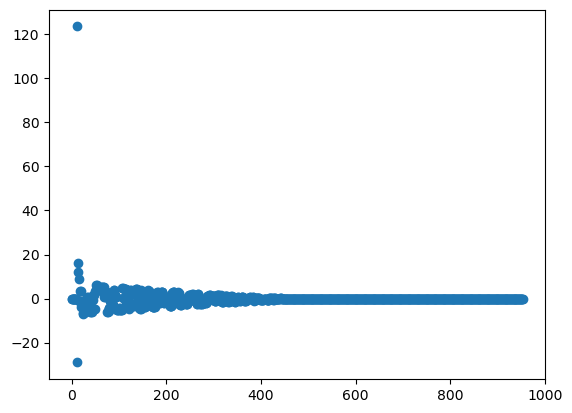

In [104]:
s,u=np.linalg.eig(all_adj_new[1])
plt.scatter(range(all_adj_new[1].shape[0]),s)

In [105]:
all_adj_new[1].shape

(954, 954)

In [106]:
## add zeros to the adj mat such that they have the same dims 
dim = 955 # Max number of vertices to determine dimension
adj_aug = np.zeros((m, dim, dim))  # Pre-allocate a zero matrix of the desired size
m=len(all_adj_new)
for i in range(m):
    ma = all_adj_new[i]  
    l = ma.shape[0]  
    adj_aug[i, :l, :l] = ma 

In [107]:
sum(adj_aug[0])

array([ 67.,  11.,   6.,  11.,  77.,   1., 120.,   2.,   0.,   2.,  71.,
         3.,   0.,   0.,   0.,   2.,  14.,   0.,   0.,   0.,   0.,   2.,
       132.,   0.,  61.,   0.,   0.,  75.,   0.,   0.,   0.,   1.,   0.,
       155., 166.,   2.,   0.,   6., 139.,   0.,   0.,  11.,  16.,   3.,
        14.,   5.,  24.,   0.,   0.,  41.,   0., 118.,   0.,   0.,  16.,
         2.,   0.,   0., 204.,  78.,   0.,   9.,   0.,  98.,   0.,   0.,
        52.,   0.,   0.,   0.,  69., 112.,  53.,  54.,  75.,   0.,   0.,
         0.,   0.,  36., 152.,  22.,   2.,   0.,   0.,  59., 168.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
       118.,   0.,   0.,   0., 208.,  65.,   0.,   0.,  80.,   0.,  19.,
         0.,  49., 126.,   1.,  28.,  27.,   0.,   0.,   0.,   8., 152.,
         0.,   8.,  12., 171.,   2.,  37.,  36.,   0., 154.,   0.,   0.,
         0., 193.,   0.,   7.,   0.,   6.,   0., 139., 206.,   1.,   0.,
         0.,  95.,   0.,   0.,   0.,  20., 143.,   

In [108]:
from scipy.optimize import quadratic_assignment
from numpy import linalg as LA
adj_gm=np.zeros([m,dim,dim])
adj_gm[0]=adj_aug[0] ## use the first graph as baseline

In [109]:
for i in range(1, m):
    res = quadratic_assignment(adj_gm[i-1],adj_aug[i],options = {'maximize': True})
    perm = res['col_ind']
    adj_gm[i]=adj_aug[i][perm][:,perm]
    before_norm = LA.norm(adj_aug[i] - adj_gm[i-1], 'fro')
    after_norm = LA.norm(adj_gm[i] - adj_gm[i-1], 'fro')

     # Printing the before and after norms to see the difference
    print(f"Frob diff before GM: {before_norm}, After GM: {after_norm}")

Frob diff before GM: 230.52114870440846, After GM: 157.24503171801646
Frob diff before GM: 223.62915731183176, After GM: 156.62694531912445
Frob diff before GM: 196.8019308848366, After GM: 136.88316185711082
Frob diff before GM: 211.392998937997, After GM: 151.1787022037165
Frob diff before GM: 245.15913199389493, After GM: 161.74980680050285
Frob diff before GM: 231.6182203540991, After GM: 162.93863875704866
Frob diff before GM: 212.98591502726183, After GM: 152.31874474272692
Frob diff before GM: 230.23249119096982, After GM: 154.32757368662283
Frob diff before GM: 252.06745129032427, After GM: 166.85322891691368
Frob diff before GM: 247.44090203521324, After GM: 167.36487086602133
Frob diff before GM: 203.7253052519495, After GM: 140.32106042928837
Frob diff before GM: 202.92609492127917, After GM: 131.12208052040663
Frob diff before GM: 218.72585581041852, After GM: 144.10065926289164
Frob diff before GM: 228.3221408449036, After GM: 154.85154180698365


In [110]:
## find largest common connected component 
prod=adj_gm[0]
for i in range(1,m):
    prod=prod * adj_gm[i]

In [96]:
from graspologic.datasets import load_drosophila_right
from graspologic.plot import heatmap
from graspologic.utils import binarize, symmetrize
import graspologic.utils as graspologic_utils

In [111]:
## find the connected component for the common edge subgraph 
[a,ind]=graspologic_utils.largest_connected_component(prod,return_inds=True)
len(ind)
n=len(ind)
n

134

In [112]:
# double check every adj mat is connected 
glist=np.zeros([m,len(ind),len(ind)])
for i in range(m):
    glist[i]=adj_gm[i][ind][:,ind]
    print(graspologic_utils.is_fully_connected(glist[i]))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


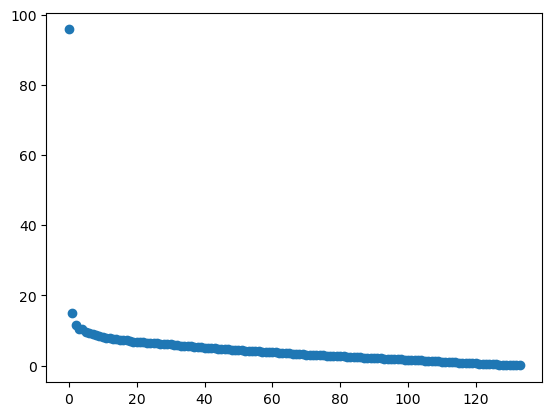

In [113]:
## scree plot for one graph 
u,s,v=np.linalg.svd(glist[0], full_matrices=True)
plt.scatter(range(n),s)

In [114]:
from graspologic.embed import AdjacencySpectralEmbed

In [116]:
tm=kk

In [117]:
ed=1
Xhat_list=np.zeros([len(tm),n,2*ed])
for i in range(len(tm)):
    ase = AdjacencySpectralEmbed(n_components=ed)
    Xhat, Yhat = ase.fit_transform(glist[i])
    Xhat_list[i][:,list(np.arange(ed))]=Xhat
    Xhat_list[i][:,list(np.arange(ed,2*ed))]=Yhat

In [118]:
from scipy.linalg import orthogonal_procrustes
D=np.zeros([len(tm),len(tm)])

In [119]:
for i in range(len(tm)):
    for j in range(len(tm)):
        R, sca = orthogonal_procrustes(Xhat_list[i] , Xhat_list[j] )
        D[i,j]=LA.norm(Xhat_list[i] @ R -  Xhat_list[j],2)**2/n  

In [120]:
J=np.ones([len(tm),len(tm)])/len(tm)
I=np.eye(len(tm))
P=I-J

Text(0, 0.5, 'eigen value')

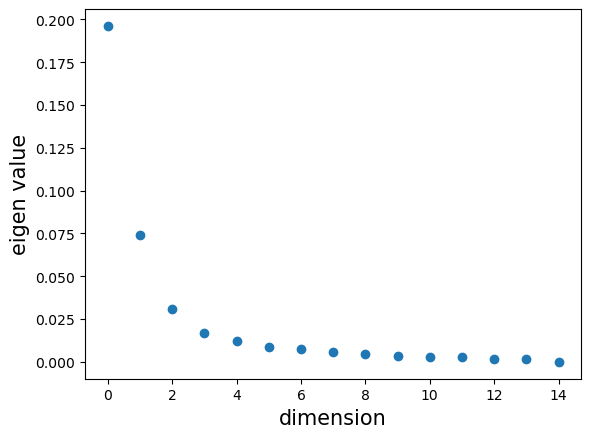

In [121]:
H=(-1/2)*P@D@P
w,v=LA.eig(H)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]
plt.scatter(range(len(tm)),w) 
#plt.title('scree plot for MDS')
plt.xlabel('dimension',fontsize=15)
plt.ylabel('eigen value',fontsize=15)

In [122]:
d=2
MDS=v[:,:d] @ np.diag(np.sqrt(w[:d]))

281

Text(0, 0.5, 'dim 2')

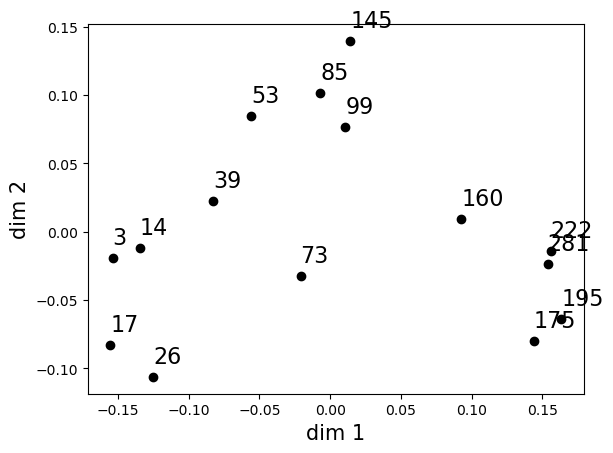

In [130]:
plt.scatter(MDS[:,0],MDS[:,1],color='black')
for i in range(len(tm)):
    plt.text(MDS[i,0],MDS[i,1]+0.01,int(float(final_data[kk[i],1])), fontsize=16)
plt.xlabel("dim 1",fontsize=15)
plt.ylabel("dim 2",fontsize=15)

In [131]:
from sklearn.manifold import Isomap

In [134]:
embedding = Isomap(n_neighbors=4,n_components=1)
iso = embedding.fit_transform(MDS)

In [105]:
%store -r time_diff

In [115]:
time_diff_tm = [time_diff[i] for i in tm]
print(time_diff_tm)


[13.216666666666667, 26.433333333333334, 39.666666666666664, 52.916666666666664, 84.63333333333334, 171.9, 221.88333333333333, 250.95, 281.6666666666667]


In [136]:
int(float(final_data[kk,1]))

TypeError: only size-1 arrays can be converted to Python scalars

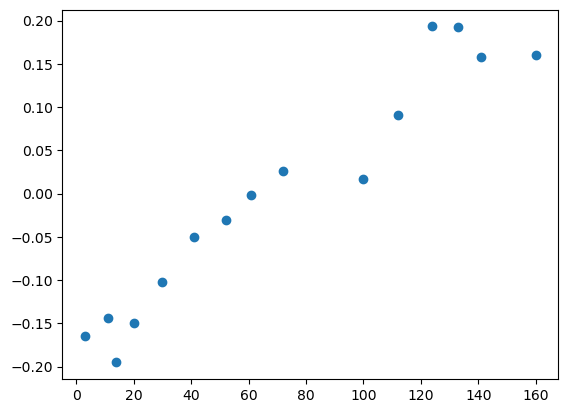

In [138]:

plt.scatter(kk, -iso)

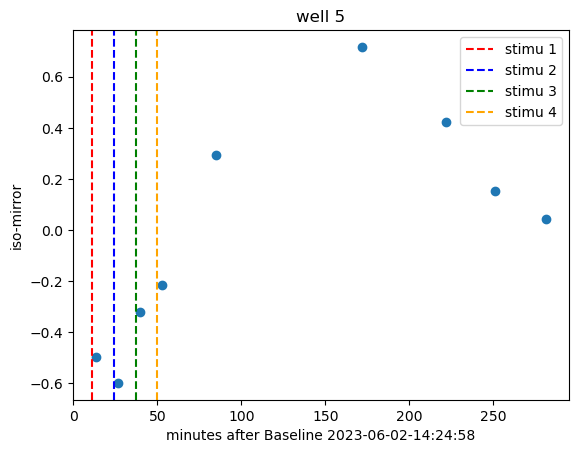

In [121]:

# Plot the scatter plot
plt.scatter(time_diff_tm, iso)

# Add vertical lines
plt.axvline(x=11, color='red', linestyle='--', label='stimu 1')
plt.axvline(x=24, color='blue', linestyle='--', label='stimu 2')
plt.axvline(x=37, color='green', linestyle='--', label='stimu 3')
plt.axvline(x=50, color='orange', linestyle='--', label='stimu 4')

# Set the x-axis label and y-axis label
plt.xlabel('minutes after Baseline 2023-06-02-14:24:58')
plt.ylabel('iso-mirror')

# Add a title
plt.title('well 5')

# Add a legend
plt.legend()

# Show the plot
plt.show()
